In [17]:
# Implementation LDA, NeuralLDA, ProdLDA, HDP(hierarchical Dirichlet Process),HDP with bigram ,LDA_tomopy
# Calculate NPMI, CV and Topic diversity with data preprocessing and without preprocessing
# use U.S. Patents dataset ---> all records of Claim_text

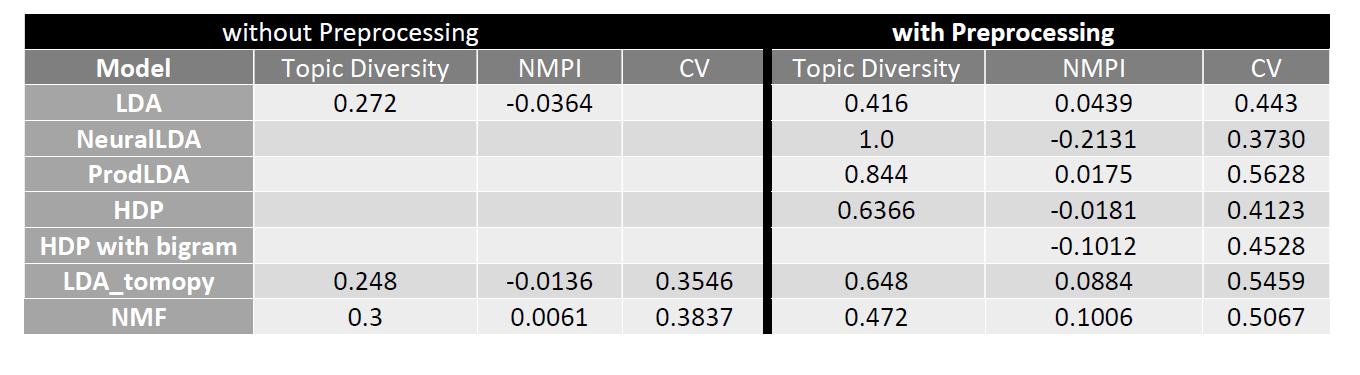

In [19]:
from octis.models.LDA import LDA
from octis.models.NeuralLDA import NeuralLDA
from octis.models.ProdLDA import ProdLDA
from octis.models.HDP import HDP
from octis.models.LDA_tomopy import LDA_tomopy
from octis.models.NMF import NMF
from octis.dataset.dataset import Dataset
from octis.evaluation_metrics.diversity_metrics import TopicDiversity
from octis.evaluation_metrics.coherence_metrics import Coherence

In [10]:
# our dataset "U.S. Patents.csv"
#Dataset without preprocessing 
 
dataset = Dataset()
dataset.load_custom_dataset_from_folder("C:/Users/admin/Topic-Modeling/dataset")

In [11]:
#Dataset with preprocessing
import os
import string
from octis.preprocessing.preprocessing import Preprocessing
os.chdir(os.path.pardir)

# Initialize preprocessing
preprocessor = Preprocessing(vocabulary=None, max_features=None,
                             remove_punctuation=True, punctuation=string.punctuation,
                             lemmatize=True, stopword_list='english',
                             min_chars=1, min_words_docs=0)

# preprocess
Preprocesed_dataset = preprocessor.preprocess_dataset(documents_path=r'C:\Users\admin\Topic-Modeling\dataset\corpus.tsv')


created vocab
46546


In [2]:
##############  LDA without Preprocessing ######################################

In [3]:
model = LDA(num_topics=25)  # Create model
model_output = model.train_model(dataset) # Train the model

# Initialize metric
npmi = Coherence(texts=dataset.get_corpus(), topk=10, measure='c_npmi')

# Initialize metric
topic_diversity = TopicDiversity(topk=10)

# Retrieve metrics score
topic_diversity_score = topic_diversity.score(model_output)
print("Topic diversity: "+str(topic_diversity_score))

npmi_score = npmi.score(model_output)
print("Coherence: "+str(npmi_score))

Topic diversity: 0.272
Coherence: -0.036482266907277676


In [ ]:
##############  LDA with Preprocessing ######################################

In [33]:
Pre_lda_model = LDA(num_topics=25)  # Create model
trained_Pre_Lda_model = Pre_lda_model.train_model(Preprocesed_dataset) # Train the model

# Initialize metric
npmi_Coherence = Coherence(texts=Preprocesed_dataset.get_corpus(), topk=10, measure='c_npmi') 

cv_Coherence = Coherence(texts=Preprocesed_dataset.get_corpus(), topk=10, measure='c_v')

topic_diversity = TopicDiversity(topk=10)

# Retrieve metrics score
topic_diversity_score = topic_diversity.score(trained_Pre_Lda_model)
print("Topic diversity with Preprocessing: "+str(topic_diversity_score))

npmi_score = npmi_Coherence.score(trained_Pre_Lda_model)
print("npmi_Coherence with Preprocessing: "+str(npmi_score))

CV_score = cv_Coherence.score(trained_Pre_Lda_model)
print("cv_Coherence with Preprocessing: "+str(CV_score))

Topic diversity with Preprocessing: 0.416
npmi_Coherence with Preprocessing: 0.043974154052606164
cv_Coherence with Preprocessing: 0.4433713803482144


In [34]:
for topic in trained_Pre_Lda_model['topics']:
    print(" ".join(topic))

probe claim sensor base system motion device comprise say plurality
light second element layer claim device portion region direction member
air set system claim device speed second position comprise fuel
second claim say comprise voltage circuit include couple method configure
claim second device comprise method portion accord processing core comprising
layer claim second comprise substrate x method metal pixel material
second claim memory node plurality system device network method storage
image say second claim signal unit sensor light plurality apparatus
claim group c method x comprise composition r compound second
x b c claim say method comprise design accord r
claim charge battery comprise device second portion method energy body
say claim signal comprise light element frame output accord input
device value claim second unit base signal control frequency method
claim second surface portion body comprise end plate position member
power second claim surface structure device method s

In [22]:
##################### NeuralLDA with Preprocessing #############################couldnt run without preprocessing

In [11]:
import inspect
print(inspect.getsource(NeuralLDA))

class NeuralLDA(AVITM):
    def __init__(self, num_topics=10, activation='softplus', dropout=0.2, learn_priors=True, batch_size=64, lr=2e-3,
                 momentum=0.99, solver='adam', num_epochs=100, reduce_on_plateau=False, prior_mean=0.0,
                 prior_variance=None, num_layers=2, num_neurons=100, num_samples=10, use_partitions=True):
        super().__init__(num_topics=num_topics, model_type='LDA', activation=activation, dropout=dropout,
                         learn_priors=learn_priors, batch_size=batch_size, lr=lr, momentum=momentum,
                         solver=solver, num_epochs=num_epochs, reduce_on_plateau=reduce_on_plateau,
                         prior_mean=prior_mean, prior_variance=prior_variance, num_layers=num_layers,
                         num_neurons=num_neurons, num_samples=num_samples, use_partitions=use_partitions)

    def train_model(self, dataset, hyperparameters=None, top_words=10):
        return super().train_model(dataset, hyperparameters,

In [35]:
NeuralLDA_model = NeuralLDA(num_topics=20)
trained_NeuralLDA_model = NeuralLDA_model.train_model(Preprocesed_dataset)

# Initialize metric
npmi_Coherence = Coherence(texts=Preprocesed_dataset.get_corpus(), topk=10, measure='c_npmi') 

cv_Coherence = Coherence(texts=Preprocesed_dataset.get_corpus(), topk=10, measure='c_v')

topic_diversity = TopicDiversity(topk=10)

# Retrieve metrics score
topic_diversity_score = topic_diversity.score(trained_NeuralLDA_model)
print("Topic diversity with Preprocessing: "+str(topic_diversity_score))

npmi_score = npmi_Coherence.score(trained_NeuralLDA_model)
print("npmi_Coherence with Preprocessing: "+str(npmi_score))

CV_score = cv_Coherence.score(trained_NeuralLDA_model)
print("cv_Coherence with Preprocessing: "+str(CV_score))


Epoch: [1/100]	Samples: [5583/558300]	Train Loss: 6070.9019344438475	Time: 0:00:07.254045
Epoch: [1/100]	Samples: [1197/119700]	Validation Loss: 5704.445710630744	Time: 0:00:00.547040
Epoch: [2/100]	Samples: [11166/558300]	Train Loss: 5683.489141142755	Time: 0:00:06.716999
Epoch: [2/100]	Samples: [1197/119700]	Validation Loss: 5544.408064431913	Time: 0:00:00.561997
Epoch: [3/100]	Samples: [16749/558300]	Train Loss: 5524.712170316138	Time: 0:00:06.739004
Epoch: [3/100]	Samples: [1197/119700]	Validation Loss: 5447.517909356725	Time: 0:00:00.548999
Epoch: [4/100]	Samples: [22332/558300]	Train Loss: 5446.733638948594	Time: 0:00:06.854997
Epoch: [4/100]	Samples: [1197/119700]	Validation Loss: 5430.3952850877195	Time: 0:00:00.567039
Epoch: [5/100]	Samples: [27915/558300]	Train Loss: 5407.481941552481	Time: 0:00:07.064001
Epoch: [5/100]	Samples: [1197/119700]	Validation Loss: 5388.981477130325	Time: 0:00:00.583960
Epoch: [6/100]	Samples: [33498/558300]	Train Loss: 5376.098255866022	Time: 0:00

In [37]:
for topic in trained_NeuralLDA_model['topics']:
    print(" ".join(topic))

example disclose embed show paul density reach communicatively production evaluation
anode transformation peak satisfied focus accessible focal silicon glass connected
invention thereon oxide kim infrared advance aspect emitter bulk spectral
disclosure david collect thomas visible chen associated fall usd isolate
james proximity variation achieve optically methods similar day template automate
identifye ultrasound compensation encrypt embody touchscreen separately private detecting compressed
michael percentage testing statistic computerized dynamically operably dependent locator led
split liu plural essentially learn constitute duplicate graphic yu situate
reading john lee history differ selecte calibration speaker assist layout
surface end portion extend body us january dispose support utility
systems grating deliver lower tire wei receipt amplify absence construct
at total thereof produce improve concentration sensitive introduce of y
able business original reduction coverage circul

In [38]:
################## ProdLDA with preprocessing ###############################

In [41]:
ProdLDA_model = ProdLDA(num_topics=25)  # Create model
trained_ProdLDA_model = ProdLDA_model.train_model(Preprocesed_dataset) # Train the model

# Initialize metric
npmi_Coherence = Coherence(texts=Preprocesed_dataset.get_corpus(), topk=10, measure='c_npmi') 

cv_Coherence = Coherence(texts=Preprocesed_dataset.get_corpus(), topk=10, measure='c_v')

topic_diversity = TopicDiversity(topk=10)

# Retrieve metrics score
topic_diversity_score = topic_diversity.score(trained_ProdLDA_model)
print("Topic diversity with Preprocessing: "+str(topic_diversity_score))

npmi_score = npmi_Coherence.score(trained_ProdLDA_model)
print("npmi_Coherence with Preprocessing: "+str(npmi_score))

CV_score = cv_Coherence.score(trained_ProdLDA_model)
print("cv_Coherence with Preprocessing: "+str(CV_score))

Epoch: [1/100]	Samples: [5583/558300]	Train Loss: 6315.261306645173	Time: 0:00:09.474997
Epoch: [1/100]	Samples: [1197/119700]	Validation Loss: 6160.1512766290725	Time: 0:00:00.812999
Epoch: [2/100]	Samples: [11166/558300]	Train Loss: 6048.111075194788	Time: 0:00:09.165001
Epoch: [2/100]	Samples: [1197/119700]	Validation Loss: 6093.403521825397	Time: 0:00:00.774004
Epoch: [3/100]	Samples: [16749/558300]	Train Loss: 5971.910856618306	Time: 0:00:09.467997
Epoch: [3/100]	Samples: [1197/119700]	Validation Loss: 6067.335108604845	Time: 0:00:00.823002
Epoch: [4/100]	Samples: [22332/558300]	Train Loss: 5934.10392877933	Time: 0:00:09.502997
Epoch: [4/100]	Samples: [1197/119700]	Validation Loss: 6127.424812030075	Time: 0:00:00.778001
Epoch: [5/100]	Samples: [27915/558300]	Train Loss: 5901.9497511978325	Time: 0:00:09.270000
Epoch: [5/100]	Samples: [1197/119700]	Validation Loss: 6093.586361737677	Time: 0:00:00.804001
Epoch: [6/100]	Samples: [33498/558300]	Train Loss: 5870.0832717624935	Time: 0:00

In [42]:
for topic in trained_ProdLDA_model['topics']:
    print(" ".join(topic))

voltage signal current control power output circuit switch supply terminal
hole outer seal central diameter rotatable extend plate engage fix
absorb lie diffuser sufficiently manufacture paste silver nitride blending planar
network device cause associate computer access instruction service non store
support diameter fix press cylindrical movable groove attach cavity flat
image display apparatus value corresponding plurality processing correspond base set
outer end assembly member fluid inner wall have engage body
value point calculate processing number pixel image parameter perform object
content computer associate request server application client key user file
second light panel line fourth source electrically element dispose electrode
equipment station ue transmit transitory mobile send program message transceiver
c composition compound alkyl thereof o hydrogen independently acid d
gj transformational gemstone elongating ornamental mra subclip huddart resize show
system base datum t

In [44]:
############################# HDP (hierarchical Dirichlet Process )########################################

In [46]:
HDP_model = HDP()  # Create model
trained_HDP_model = HDP_model.train_model(Preprocesed_dataset) # Train the model

# Initialize metric
npmi_Coherence = Coherence(texts=Preprocesed_dataset.get_corpus(), topk=10, measure='c_npmi') 

cv_Coherence = Coherence(texts=Preprocesed_dataset.get_corpus(), topk=10, measure='c_v')

topic_diversity = TopicDiversity(topk=10)

# Retrieve metrics score
topic_diversity_score = topic_diversity.score(trained_HDP_model)
print("Topic diversity with Preprocessing: "+str(topic_diversity_score))

npmi_score = npmi_Coherence.score(trained_HDP_model)
print("npmi_Coherence with Preprocessing: "+str(npmi_score))

CV_score = cv_Coherence.score(trained_HDP_model)
print("cv_Coherence with Preprocessing: "+str(CV_score))

Topic diversity with Preprocessing: 0.6366666666666667
npmi_Coherence with Preprocessing: -0.018164745865745395
cv_Coherence with Preprocessing: 0.412384395314585


In [47]:
############################# HDP (hierarchical Dirichlet Process ) with bigram ########################################

In [3]:
# Read uspto dataset
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

usptodata = pd.read_csv(r'C:\Users\admin\Topic-Modeling\U.S. Patents.csv')
usptodataset=usptodata[["grant_id","claims_text","abstract"]]
usptodataset= usptodataset.dropna()
usptodataset = usptodataset.reset_index(drop=True)
usptodataset.head()

,grant_id,claims_text,abstract
0,USPP030977,1. A new and distinct Mango plant characterize...,"A new and distinct variety of Mango plant, her..."
1,USPP030978,1. A new and distinct apple tree substantially...,&#x2018;Honeysuckle Rose #1-6&#x2019; is a new...
2,USPP030979,1. A new and distinct variety of peach tree as...,"A new and distinct peach tree variety, <i>Prun..."
3,USPP030980,1. A new and distinct variety of raspberry pla...,This invention relates to a new and distinct v...
4,USPP030981,1. A new and distinct Strawberry plant named &...,A new and distinct cultivar of Strawberry plan...


In [4]:
stopwords = nltk.corpus.stopwords.words('english')

def lemma(word): #map pos tag
    tag = nltk.pos_tag([word])[0][1][0].upper()
    allowed_tags = {'J','N', 'V', 'R'}
    if tag in allowed_tags:
        lemma = WordNetLemmatizer().lemmatize(word)
        return lemma
    else:
        return ''
    
def  prepare_text(text):
    tokens = word_tokenize(text)
    tokens = [token  for token in tokens if len(token)> 3]
    tokens = [token for token in tokens if token not in stopwords]
    token = [lemma(token) for token in tokens]
    return tokens
    
usptodataset['Text'] = usptodataset['claims_text'].astype(str)
usptodataset['Text'] = usptodataset['Text'].apply(prepare_text)

In [77]:
 #nltk.download()

In [5]:
#bigram Modeling
import gensim
from gensim import corpora
from gensim.models import CoherenceModel
from gensim.models.phrases import Phrases, Phraser

bigram = gensim.models.phrases.Phrases(usptodataset['Text'], min_count=5, threshold=10)
usptodataset['Text'] = usptodataset['Text'].map(lambda x: list(bigram[x]))

text_data = usptodataset['Text']
dictionary = corpora.Dictionary(text_data)
dictionary.filter_extremes(no_below=2, no_above=0.5, keep_n=100000)
corpus = [dictionary.doc2bow(txt) for txt in text_data]

In [7]:
from gensim.models import HdpModel

hdp = HdpModel(corpus, dictionary)

npmi_Coherence_hdp = CoherenceModel(model=hdp, texts=text_data, dictionary= dictionary, coherence='c_npmi') 
print("npmi_Coherence for hdp: " + str(npmi_Coherence_hdp.get_coherence()))

cv_Coherence_hdp = CoherenceModel(model=hdp, texts=text_data, dictionary= dictionary, coherence='c_v') 
print("cv_Coherence for hdp: "+ str(cv_Coherence_hdp.get_coherence()))


npmi_Coherence for hdp: -0.1012337022617637
cv_Coherence for hdp: 0.45281748612977213


In [ ]:
################### LDA_tomopy without preprocssing #################################

In [13]:
LDA_tomopy_model = LDA_tomopy(num_topics=25)  # Create model
trained_LDA_tomopy_model = LDA_tomopy_model.train_model(dataset) # Train the model

# Initialize metric
npmi_Coherence = Coherence(texts=dataset.get_corpus(), topk=10, measure='c_npmi') 

cv_Coherence = Coherence(texts=dataset.get_corpus(), topk=10, measure='c_v')

topic_diversity = TopicDiversity(topk=10)

# Retrieve metrics score
topic_diversity_score = topic_diversity.score(trained_LDA_tomopy_model)
print("Topic diversity without Preprocessing: "+str(topic_diversity_score))

npmi_score = npmi_Coherence.score(trained_LDA_tomopy_model)
print("npmi_Coherence without Preprocessing: "+str(npmi_score))

CV_score = cv_Coherence.score(trained_LDA_tomopy_model)
print("cv_Coherence without Preprocessing: "+str(CV_score))

Topic diversity without Preprocessing: 0.248
npmi_Coherence without Preprocessing: -0.013658232291903423
cv_Coherence without Preprocessing: 0.3546616753198933


In [ ]:
################### LDA_tomopy with preprocssing #################################

In [14]:
Pre_LDA_tomopy_model = LDA_tomopy(num_topics=25)  # Create model
trained_Pre_LDA_tomopy_model = Pre_LDA_tomopy_model.train_model(Preprocesed_dataset) # Train the model

# Initialize metric
npmi_Coherence = Coherence(texts=Preprocesed_dataset.get_corpus(), topk=10, measure='c_npmi') 

cv_Coherence = Coherence(texts=Preprocesed_dataset.get_corpus(), topk=10, measure='c_v')

topic_diversity = TopicDiversity(topk=10)

# Retrieve metrics score
topic_diversity_score = topic_diversity.score(trained_Pre_LDA_tomopy_model)
print("Topic diversity with Preprocessing: "+str(topic_diversity_score))

npmi_score = npmi_Coherence.score(trained_Pre_LDA_tomopy_model)
print("npmi_Coherence with Preprocessing: "+str(npmi_score))

CV_score = cv_Coherence.score(trained_Pre_LDA_tomopy_model)
print("cv_Coherence with Preprocessing: "+str(CV_score))

Topic diversity with Preprocessing: 0.648
npmi_Coherence with Preprocessing: 0.08845935330467487
cv_Coherence with Preprocessing: 0.545944760917573


In [15]:
for topic in trained_Pre_LDA_tomopy_model['topics']:
    print(" ".join(topic))

frame location time audio sub method claim window target reference
flow pressure air fluid valve gas chamber system water claim
circuit second signal power voltage output switch control terminal current
display image user claim second touch area input screen object
x c group b r n o compound d alkyl
datum storage device memory data system claim store configure plurality
line cell module plurality connect second fuel memory battery claim
claim method comprise composition acid d sequence accord weight thereof
surface claim element accord outer form b direction inner second
object datum network second node video system claim test plurality
yl h n methyl r chloro phenyl carboxamide s pyrimidin
communication wireless device second channel network transmit claim signal transmission
value unit time accord processing determine second control image apparatus
liquid heat energy second claim temperature pump apparatus fiber radiation
sensor signal region point pixel claim plurality system sample 

In [18]:
################### NMF without preprocssing #################################

In [20]:
NMF_model = NMF(num_topics=25)  # Create model
trained_NMF_model = NMF_model.train_model(dataset) # Train the model

# Initialize metric
npmi_Coherence = Coherence(texts=dataset.get_corpus(), topk=10, measure='c_npmi') 

cv_Coherence = Coherence(texts=dataset.get_corpus(), topk=10, measure='c_v')

topic_diversity = TopicDiversity(topk=10)

# Retrieve metrics score
topic_diversity_score = topic_diversity.score(trained_NMF_model)
print("Topic diversity without Preprocessing: "+str(topic_diversity_score))

npmi_score = npmi_Coherence.score(trained_NMF_model)
print("npmi_Coherence without Preprocessing: "+str(npmi_score))

CV_score = cv_Coherence.score(trained_NMF_model)
print("cv_Coherence without Preprocessing: "+str(CV_score))

Topic diversity without Preprocessing: 0.3
npmi_Coherence without Preprocessing: 0.006156487263497398
cv_Coherence without Preprocessing: 0.3837018010161183


In [ ]:
################### NMF with preprocssing #################################

In [21]:
Pre_NMF_model = NMF(num_topics=25)  # Create model
trained_Pre_NMF_model = Pre_NMF_model.train_model(Preprocesed_dataset) # Train the model

# Initialize metric
npmi_Coherence = Coherence(texts=Preprocesed_dataset.get_corpus(), topk=10, measure='c_npmi') 

cv_Coherence = Coherence(texts=Preprocesed_dataset.get_corpus(), topk=10, measure='c_v')

topic_diversity = TopicDiversity(topk=10)

# Retrieve metrics score
topic_diversity_score = topic_diversity.score(trained_Pre_NMF_model)
print("Topic diversity with Preprocessing: "+str(topic_diversity_score))

npmi_score = npmi_Coherence.score(trained_Pre_NMF_model)
print("npmi_Coherence with Preprocessing: "+str(npmi_score))

CV_score = cv_Coherence.score(trained_Pre_NMF_model)
print("cv_Coherence with Preprocessing: "+str(CV_score))

Topic diversity with Preprocessing: 0.472
npmi_Coherence with Preprocessing: 0.10068407853964599
cv_Coherence with Preprocessing: 0.5067924291256994
